<a href="https://colab.research.google.com/github/Balan666/Python_BI_2022/blob/HW5(pandas%26graphics)/Pandas_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def read_gff(file_path):
    gff = pd.read_csv(file_path, sep='\t', comment='t',
                     names=['seqid', 'resourse', 'type', 'start', 'end', 'score', 'strand', 'frame', 'attribute'])
    gff.drop(index = gff[gff['seqid'].str.contains('#')].index, inplace=True)
    gff.reset_index(inplace=True)
    gff['attribute'] = gff['attribute'].astype(str).apply(lambda x: x.split('_')[0].split('=')[1])
    return gff


def read_bed6(file_path):
    bed6 = pd.read_csv(file_path, sep='\t',  names = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand'])
    return bed6


def rna_count(file_path):
    gff = read_gff(file_path)
    rnas_count = gff.groupby(['seqid','attribute']).size().to_frame().reset_index()
    rnas_count = rnas_count.rename(columns={0:'quantity', 'attribute':'RNA type'})
    return rnas_count




#print(read_bed6('alignment.bed'))

In [ ]:
gff = read_gff('/rrna_annotation.gff')
bed = read_bed6('alignment.bed')
gff.join(bed,lsuffix='_caller', rsuffix='_other')

,index,seqid,resourse,type,start,end,score_caller,strand_caller,frame,attribute,chrom,chromStart,chromEnd,name,score_other,strand_other
0,1,Reference_10,barrnap:0.9,rRNA,67122.0,68652.0,0.000000e+00,+,.,16S,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,2,Reference_10,barrnap:0.9,rRNA,68981.0,72061.0,0.000000e+00,+,.,23S,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,3,Reference_10,barrnap:0.9,rRNA,469298.0,470826.0,0.000000e+00,+,.,16S,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,4,Reference_10,barrnap:0.9,rRNA,471166.0,474246.0,0.000000e+00,+,.,23S,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,5,Reference_10,barrnap:0.9,rRNA,3629599.0,3632680.0,0.000000e+00,-,.,23S,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,344,Reference_25,barrnap:0.9,rRNA,1819878.0,1822785.0,0.000000e+00,+,.,23S,Reference_2,1446641,1446776,NODE_19407_length_135_cov_4877.375000,0,-
344,345,Reference_25,barrnap:0.9,rRNA,1822913.0,1823016.0,2.900000e-10,+,.,5S,Reference_2,1446721,1446790,NODE_19881_length_69_cov_5960.357143,0,+
345,346,Reference_25,barrnap:0.9,rRNA,3744056.0,3744159.0,2.900000e-10,-,.,5S,Reference_2,1446735,1446845,NODE_19541_length_110_cov_4890.400000,0,+
346,347,Reference_25,barrnap:0.9,rRNA,3744287.0,3747194.0,0.000000e+00,-,.,23S,Reference_2,1446735,1446790,NODE_19623_length_104_cov_609.877551,0,-


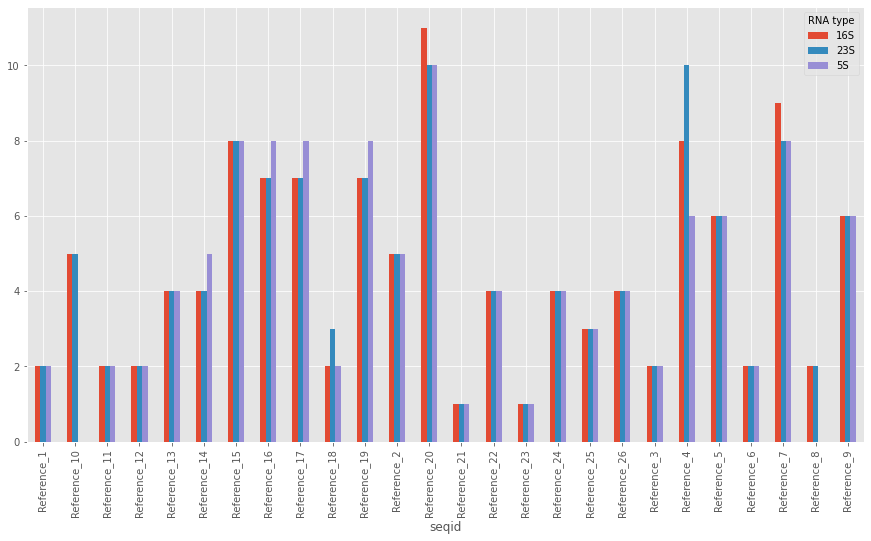

In [ ]:
gff_file = rna_count('/rrna_annotation.gff')
gff_file.pivot(index='seqid', columns='RNA type', values='quantity').plot.bar(figsize=(15,8))

In [ ]:
diffexpr_data = pd.read_csv('/diffexpr_data.tsv.gz', header=0, sep='\t', quotechar='"')
print(diffexpr_data)

In [ ]:
data_for_volcano = diffexpr_data[['logFC','log_pval']]
print(data_for_volcano)

In [ ]:
s_down = data_for_volcano.query('`logFC`<0 and `log_pval`>0.5')
s_up = data_for_volcano.query('`logFC`>0 and `log_pval`>0.5')
ns_down = data_for_volcano.query('`logFC`<0 and `log_pval`<0.5')
ns_up = data_for_volcano.query('`logFC`>0 and `log_pval`<0.5')

In [342]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

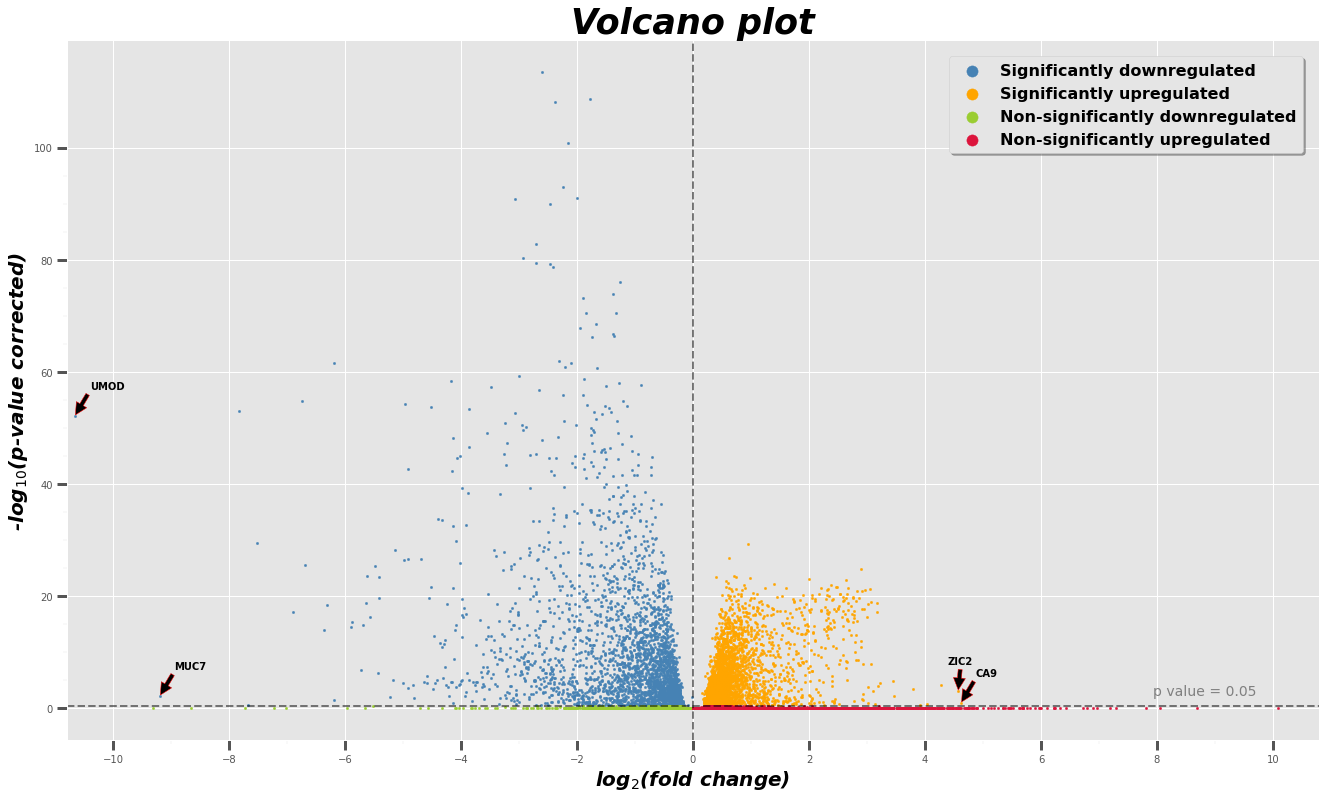

In [360]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.set_xticks([i for i in range(-10,11,2)], minor=False)
ax.set_xticks([i for i in range(-10,11)], minor=True)
ax.set_yticks([i for i in range(0,101,20)], minor=False)
ax.set_yticks([i for i in range(0,101,5)], minor=True)
ax.tick_params(axis='both', length=10, width=3)
ax.tick_params(which='minor', length=4, color='black')
plt.rc("xtick.minor", visible=True)
plt.rc("ytick.minor", visible=True)
plt.rc("xtick.minor", width=0.05)
plt.rc("ytick.minor", width=0.05)

plt.scatter(s_down['logFC'],s_down['log_pval'], color = 'steelblue', s=5, label='Significantly downregulated')
plt.scatter(s_up['logFC'],s_up['log_pval'], color = 'orange', s=5, label='Significantly upregulated')
plt.scatter(ns_down['logFC'],ns_down['log_pval'], color = 'yellowgreen', s=5, label='Non-significantly downregulated')
plt.scatter(ns_up['logFC'],ns_up['log_pval'], color = 'crimson', s=5, label='Non-significantly upregulated')

ax.axhline(0.5, linestyle="--", alpha=0.5, color='black', linewidth=2)
ax.axvline(0, linestyle="--", alpha=0.5, color='black', linewidth=2)

plt.legend(shadow=True, markerscale=5.0, borderaxespad=1, prop={'size':16, 'weight':'bold'})
ax.set_xlim(-54 * width, 54 * width)

plt.xlabel('log$_2$(fold change)', size=20, style='italic', weight="bold", color="black",fontfamily = 'sans-serif')
plt.ylabel("-log$_{10}$(p-value corrected)", size=20, style='italic', weight="bold", color="black",fontfamily = 'sans-serif')
plt.title("Volcano plot", size=35, style='italic', weight="bold", color="black",fontfamily = 'sans-serif')

ax.text(0.95, 0.06, 'p value = 0.05',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='grey', fontsize=14)

s_up_2 = diffexpr_data[diffexpr_data['log_pval']>0.05].head(2)[['Sample', 'logFC','log_pval']] # 2 Significantly upregulated samples to annotate
s_down_2 = diffexpr_data[diffexpr_data['log_pval']>0.05].tail(2)[['Sample', 'logFC','log_pval']] # 2 Significantly downregulated samples to annotate

ax.annotate('UMOD',
            xy=(-10.661093, 52.117378), xycoords='data',weight='bold',
            xytext=(15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05, edgecolor='red'),
            horizontalalignment='left', verticalalignment='bottom')
ax.annotate('MUC7',
            xy=(-9.196481, 2.171498), xycoords='data',weight='bold',
            xytext=(15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05, edgecolor='red'),
            horizontalalignment='left', verticalalignment='bottom')
ax.annotate('CA9',
            xy=(4.617241, 0.935710), xycoords='data',weight='bold',
            xytext=(15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05, edgecolor='red'),
            horizontalalignment='left', verticalalignment='bottom')
ax.annotate('ZIC2',
            xy=(4.571915, 3.075183), xycoords='data', weight='bold',
            xytext=(15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05, edgecolor='red'),
            horizontalalignment='right', verticalalignment='bottom')



plt.show()

In [ ]:
from matplotlib.patches import ConnectionPatch

In [361]:
gff_file = rna_count('/rrna_annotation.gff')
x = gff_file.pivot(index='seqid', columns='RNA type', values='quantity')

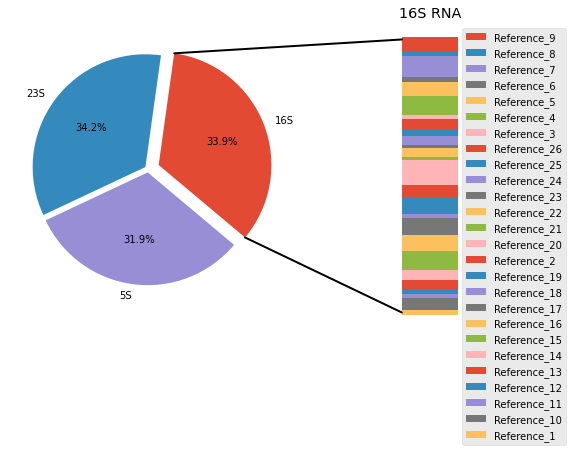

In [386]:
# make data
gff_file = rna_count('/rrna_annotation.gff')
x = gff_file.pivot(index='seqid', columns='RNA type', values='quantity')

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

overall_ratios = [x['16S'].sum(),x['23S'].sum(),x['5S'].sum()]
labels = ['16S', '23S', '5S']
explode = [0.1, 0.03, 0.03]

# rotate so that first wedge is split by the x-axis
angle = -40 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, wedgeprops = {'linewidth': 3})

for i in wedges:
  ax.annotate(i,xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment)

# bar chart parameters
rna_ratios = x['16S']
rna_labels = x.index.values
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(rna_ratios, rna_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, label=label)
    #ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('16S RNA')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, -116), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()